In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
cols = ["V1","V2","V3","V4", "V5", "Target"]
assignment = pd.read_csv("Assignment.csv", encoding='utf-8', header=None, names=cols)

In [3]:
assignment = assignment.iloc[1:,:-1] # to skip the header and label

In [4]:
assignment.describe() # why is this not showing all details?

,V1,V2,V3,V4,V5
count,748,748,748,748,748
unique,32,33,33,78,1
top,2.0,1.0,250.0,4.0,NEGATIVE
freq,171,158,158,57,748


In [5]:
#how many features have unknowns; and what's the total number of unknowns
print((assignment['V1'] == "?").sum())
print((assignment['V2'] == "?").sum())
print((assignment['V3'] == "?").sum())
print((assignment['V4'] == "?").sum())
print((assignment['V5'] == "?").sum())

5
5
0
0
0


In [6]:
assignment.replace("?", 0, inplace=True) # replace all ? by np.nan
assignment.replace('NEGATIVE', 1, inplace=True)

In [7]:
V1 = assignment['V1'].astype(float)
V2 = assignment['V2'].astype(float)
V3 = assignment['V3'].astype(float)
V4 = assignment['V4'].astype(float)
V5 = assignment['V5'].astype(float)

In [8]:
print(np.var(V1), np.var(V2), np.var(V3), np.var(V4), np.var(V5))

65.5868966084245 33.565643855986664 2128245.173403577 593.4297860247633 0.0


In [9]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
si.fit_transform(assignment)[:,1].mean()

5.427807486631016

In [10]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3)
knn.fit_transform(assignment)[:,0].mean()

9.498663101604278

{'whiskers': [<matplotlib.lines.Line2D at 0x2ddaff081c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2ddaff08820>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ddadeead30>],
 'medians': [<matplotlib.lines.Line2D at 0x2ddaff08f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ddaff12310>],
 'means': []}

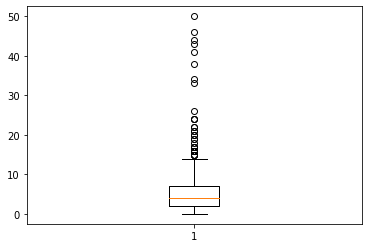

In [11]:
plt.boxplot(V2) #has the least number of outliers compared to V2 and V3

#### Q.1

In [12]:
cols = ["V1","V2","V3","V4", "V5", "Target"]
assignment = pd.read_csv("Assignment.csv", encoding='utf-8', header=None, names=cols)

In [13]:
labels = assignment.pop('Target')[1:]

In [14]:
assignment = assignment.iloc[1:,:] # to skip the header and label

In [15]:
assignment.replace("?", 0, inplace=True) # replace all ? by np.nan
assignment.replace('NEGATIVE', 1, inplace=True)

In [16]:
assignment

,V1,V2,V3,V4,V5
1,2.0,50.0,12500.0,98.0,1
2,0.0,13.0,3250.0,28.0,1
3,0,0,4000.0,35.0,1
4,0,20.0,5000.0,45.0,1
5,1.0,24.0,6000.0,77.0,1
...,...,...,...,...,...
744,23.0,2.0,500.0,38.0,1
745,21.0,2.0,500.0,52.0,1
746,23.0,3.0,750.0,62.0,1
747,39.0,1.0,250.0,39.0,1


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.feature_selection import VarianceThreshold

si = SimpleImputer(strategy='mean')
ss = StandardScaler()
oe = OrdinalEncoder()

SI = ('1', si, [0, 1])
SS = ('2', ss, [0, 1, 2, 3])
OE = ('3', oe, [4])

PIPE_1 = ('pipe_1', ColumnTransformer([SI, ('pass', 'passthrough', [3,4])]))
PIPE_2 = ('pipe_2', ColumnTransformer([SS]))
PIPE_3 = ('pipe_3', ColumnTransformer([OE]))

pipe_12 = Pipeline([PIPE_1, PIPE_2])
pipe_3 = Pipeline([PIPE_3])

fu = FeatureUnion(transformer_list=[('LHS', pipe_12), 
                                    ('RHS', pipe_3)])

In [18]:
fu.fit_transform(assignment)

array([[-0.92592391,  7.693368  ,  2.61563344,  0.        ,  0.        ],
       [-1.17288098,  1.30699569, -0.2578809 ,  0.        ,  0.        ],
       [-1.17288098, -0.93686485,  0.02947053,  0.        ,  0.        ],
       ...,
       [ 1.66712527, -0.41905088,  1.13782607,  0.        ,  0.        ],
       [ 3.64278178, -0.76426019,  0.19367135,  0.        ,  0.        ],
       [ 7.71757335, -0.76426019,  1.54832812,  0.        ,  0.        ]])

In [19]:
vt = VarianceThreshold(threshold=0.1)

from sklearn import set_config
set_config(display='diagram')
Final = Pipeline([('fu', fu), ('vt', vt)])
Final

Pipeline(steps=[('fu',
                 FeatureUnion(transformer_list=[('LHS',
                                                 Pipeline(steps=[('pipe_1',
                                                                  ColumnTransformer(transformers=[('1',
                                                                                                   SimpleImputer(),
                                                                                                   [0,
                                                                                                    1]),
                                                                                                  ('pass',
                                                                                                   'passthrough',
                                                                                                   [3,
                                                                                                    4])])),
                                                                 ('pipe_2',
                                                                  ColumnTransformer(transformers=[('2',
                                                                                                   StandardScaler(),
                                                                                                   [0,
                                                                                                    1,
                                                                                                    2,
                                                                                                    3])]))])),
                                                ('RHS',
                                                 Pipeline(steps=[('pipe_3',
                                                                  ColumnTransformer(transformers=[('3',
                                                                                                   OrdinalEncoder(),
                                                                                                   [4])]))]))])),
                ('vt', VarianceThreshold(threshold=0.1))])

In [20]:
X = Final.fit_transform(assignment)

In [21]:
X

array([[-0.92592391,  7.693368  ,  2.61563344],
       [-1.17288098,  1.30699569, -0.2578809 ],
       [-1.17288098, -0.93686485,  0.02947053],
       ...,
       [ 1.66712527, -0.41905088,  1.13782607],
       [ 3.64278178, -0.76426019,  0.19367135],
       [ 7.71757335, -0.76426019,  1.54832812]])

#### Q.2

In [22]:
fu.fit_transform(assignment)

array([[-0.92592391,  7.693368  ,  2.61563344,  0.        ,  0.        ],
       [-1.17288098,  1.30699569, -0.2578809 ,  0.        ,  0.        ],
       [-1.17288098, -0.93686485,  0.02947053,  0.        ,  0.        ],
       ...,
       [ 1.66712527, -0.41905088,  1.13782607,  0.        ,  0.        ],
       [ 3.64278178, -0.76426019,  0.19367135,  0.        ,  0.        ],
       [ 7.71757335, -0.76426019,  1.54832812,  0.        ,  0.        ]])

In [23]:
# Calculating labels
labels.unique()

array(['YES', 'NO'], dtype=object)

In [24]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
y = oe.fit_transform(np.array(labels).reshape(-1,1))
print(X.shape, y.shape)

(748, 3) (748, 1)


In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(X, y)

print(selector.support_)  # True indicates selected columns

print(f"Rank of each feature are {selector.ranking_}") # rank 1 assigned to only selected features.

[ True  True False]
Rank of each feature are [1 1 2]


In [26]:
%%time

#Forward sequence selector
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
X_new = sfs.fit_transform(X, y)
X_new.shape

Wall time: 33.4 ms


(748, 2)

In [27]:
sfs.get_feature_names_out()

array(['x0', 'x1'], dtype=object)

In [28]:
%%time

#Backward sequence selector - depends on n_features_to_select.
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=2, direction='backward')
X_new = sfs.fit_transform(X, y)
X_new.shape

Wall time: 14.8 ms


(748, 2)

In [29]:
sfs.get_feature_names_out()

array(['x0', 'x1'], dtype=object)